You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [4]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [5]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [6]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(Tanh(25))
    model.add_layer(Linear(25, 2))
    return model

In [7]:
model = build_model()
model.summary()
model.fit(x_train, y_train, x_validation, y_validation, epochs=40, step_size=0.001)

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.13642060793656857
Loss at epoch 2 : 0.10899916099055554
Loss at epoch 3 : 0.10024924935778835
Loss at epoch 4 : 0.09626395444911032
Loss at epoch 5 : 0.087072189292232
Loss at epoch 6 : 0.09794072285921902
Loss at epoch 7 : 0.09189061636925362
Loss at epoch 8 : 0.08280598306177603
Loss at epoch 9 : 0.08079675316884095
Loss at epoch 10 : 0.07960996682536996
Loss at epoch 11 : 0.07976260364068002
Loss at epoch 12 : 0.08065914808238267
Loss at epoch 13 : 0.07983436302693735
Loss at epoch 14 : 0.0760183030795306
Loss at epoch 15 : 0.08212951892857381
Loss at epoch 16 : 0.07816639241385565
Loss at epoch 17 : 0.07568485412541485
Loss at epoch 18 : 0.0795269179887473
Loss at epoch 1

(0.953, 0.953)

In [8]:
preds = model.predict(x_validation)

In [9]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [10]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

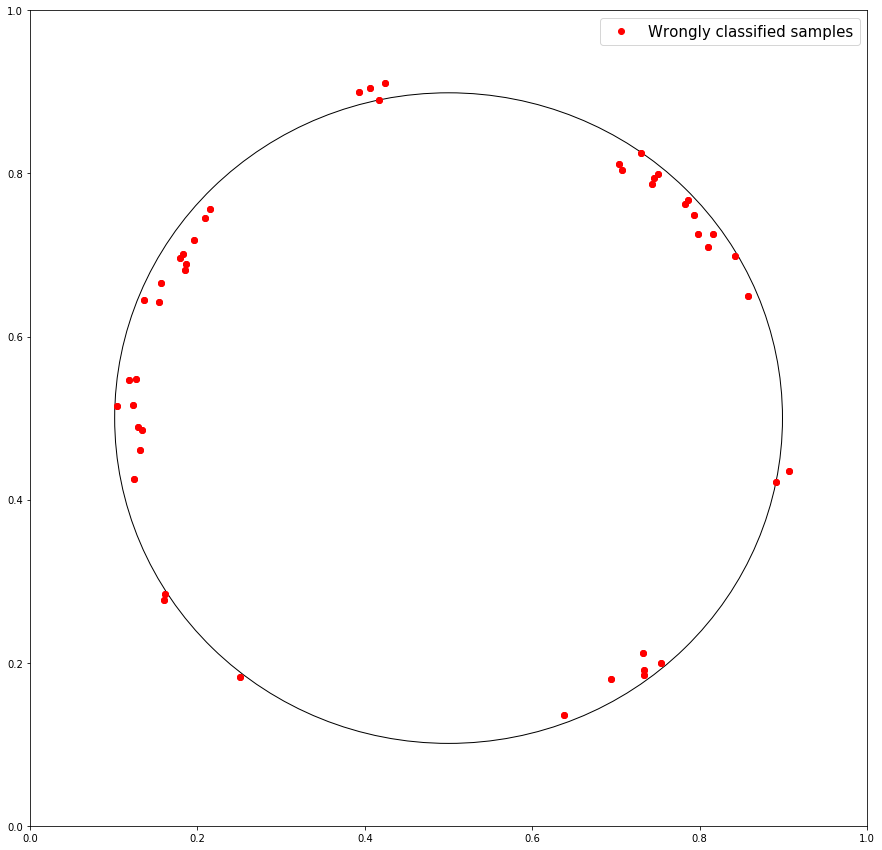

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified samples')
# plt.plot(x2, y2, 'ro', color='grey', label='Well classified')
ax.add_artist(plt.Circle((0.5, 0.5), 1/math.sqrt(2*math.pi), fill=False, color='black'))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='best', prop={'size': 15})


We see that the classifier makes mistakes on the boundary which is normal.